# 《动手学深度学习》Pytorch 第0部分
**官方文档：https://pytorch.org/docs/stable/tensors.html**
## 0.Pytorch基本数据操作
### 0.0.0 创建Tensor
首先<font color=orange> 导入 </font>PyTorch:

In [1]:
import torch

创建5x3的<font color=orange> 未初始化 </font>的Tensor:

In [2]:
x = torch.empty(5,3)
x

tensor([[1.0194e-38, 8.4490e-39, 1.0469e-38],
        [9.3674e-39, 9.9184e-39, 8.7245e-39],
        [9.2755e-39, 8.9082e-39, 9.9184e-39],
        [8.4490e-39, 9.6429e-39, 1.0653e-38],
        [1.0469e-38, 4.2246e-39, 1.0378e-38]])

创建5x3的<font color=red> 随机 </font><font color=orange> 初始化 </font>的Tensor:

In [3]:
x = torch.rand(5,3)
x

tensor([[0.3377, 0.1588, 0.4428],
        [0.3722, 0.0731, 0.6064],
        [0.4852, 0.2614, 0.8486],
        [0.4027, 0.8981, 0.5061],
        [0.2674, 0.9270, 0.0928]])

创建5x3的long型<font color=orange> 全0 </font>的Tensor:

In [5]:
x = torch.zeros(5,3,dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

还可以**<font color=red> 直接根据数据创建的Tensor </font>**：

In [6]:
x = torch.tensor([[5.5,3],[1,3.5]])
x

tensor([[5.5000, 3.0000],
        [1.0000, 3.5000]])

还可以<font color=orange> 通过现有的Tensor来创建 </font>，此方法会<font color=orange>默认重用输入Tensor的一些属性</font>，例如数据类型，除非自定义数据类型。

In [7]:
x = x.new_ones(5,3,dtype=torch.float64) ## 返回的tensor默认具有相同的torch.dtype和torch.device
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [8]:
x = torch.randn_like(x,dtype=torch.float) # 指定新的数据类型
print(x) 

tensor([[-0.6606,  1.9813, -1.1147],
        [ 0.3013, -1.1546, -0.4283],
        [-0.4608,  1.3844, -1.5701],
        [ 0.3074, -0.2059,  0.8167],
        [ 2.0144, -0.3927,  1.1221]])


通过<font color=orange> shape </font>或者<font color=orange>size()</font>来获取<font color=orange> Tensor的形状 </font>

In [9]:
x.size(),x.shape

(torch.Size([5, 3]), torch.Size([5, 3]))

#### 创建Tensor常用方法

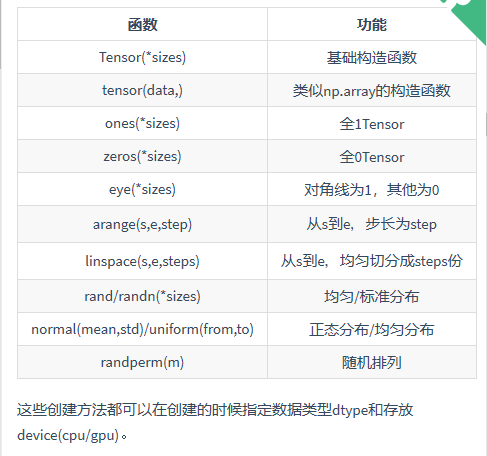

### 0.0.1 算术操作
* 加法形式一

In [10]:
y = torch.rand(5,3)
x+y

tensor([[-0.3071,  2.4747, -0.6369],
        [ 1.1942, -0.3673,  0.4752],
        [ 0.1433,  1.8289, -1.2175],
        [ 0.4612, -0.1456,  1.0887],
        [ 2.9033,  0.5651,  1.6176]])

* 加法形式二

In [11]:
torch.add(x,y)

tensor([[-0.3071,  2.4747, -0.6369],
        [ 1.1942, -0.3673,  0.4752],
        [ 0.1433,  1.8289, -1.2175],
        [ 0.4612, -0.1456,  1.0887],
        [ 2.9033,  0.5651,  1.6176]])

还可指定输出：

In [12]:
result = torch.empty(5,3)
torch.add(x,y,out=result)
result

tensor([[-0.3071,  2.4747, -0.6369],
        [ 1.1942, -0.3673,  0.4752],
        [ 0.1433,  1.8289, -1.2175],
        [ 0.4612, -0.1456,  1.0887],
        [ 2.9033,  0.5651,  1.6176]])

* 加法形式三、inplace

In [13]:
y.add_(x)
y

tensor([[-0.3071,  2.4747, -0.6369],
        [ 1.1942, -0.3673,  0.4752],
        [ 0.1433,  1.8289, -1.2175],
        [ 0.4612, -0.1456,  1.0887],
        [ 2.9033,  0.5651,  1.6176]])

**<font color=red> 注：PyTorch操作inplace版本都有后缀_ </font>**, 例如x.copy_(y), x.t_()

### 索引：与Numpy和列表索引方式一样
**注意：索引出来的结果与原数据<font color=red> 共享内存，也即修改一个，另一个会跟着修改。 </font>**

In [14]:
y=x[0,:]
y

tensor([-0.6606,  1.9813, -1.1147])

* **除了常用的索引选择数据之外，PyTorch还提供了一些高级的选择函数:**
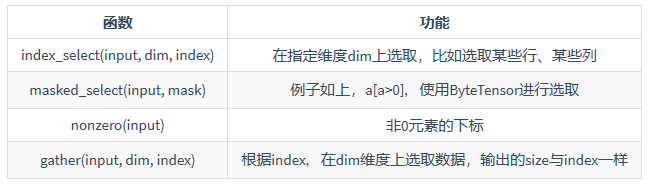

### 改变形状
用<font color=orange>view()</font>来改变Tensor的形状：
* <font color=orange>-1所指的维度可以根据其他维度的值推出来)</font>
* **注意：view出来的结果与原数据<font color=red> 共享内存，也即修改一个，另一个会跟着修改。 </font>**(要另外创建一个新的数据使用reshape或是联合clone和view使用)

In [17]:
y = x.view(15)
z = x.view(-1,5)  
x.size(),y.size(),z.size()

(torch.Size([5, 3]), torch.Size([15]), torch.Size([3, 5]))

#### item():<font color=orange> 它可以将一个标量Tensor转换成一个Python number</font>：

In [18]:
x = torch.randn(1)
print(x.item())

-1.183804988861084


#### 线性代数
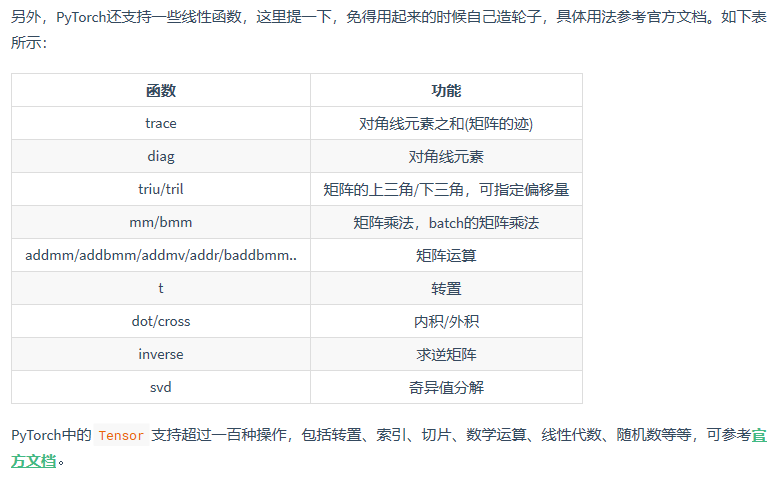

### 0.0.2 广播机制：与tf一样

### Tensor和Numpy相互转换
我们很容易用**<font color=orange>numpy()</font>**和**<font color=orange>from_numpy()</font>**将Tensor和NumPy中的数组相互转换。但是需要注意的一点是： 这两个函数所产生的的Tensor和NumPy中的数组<font color=orange>共享相同的内存</font>（所以他们之间的转换很快），改变其中一个时另一个也会改变！！！
#### Tensor 转NumPy

In [19]:
a = torch.ones(5)
b = a.numpy()
print(a,b)

tensor([1., 1., 1., 1., 1.]) [ 1.  1.  1.  1.  1.]


#### NumPy数组转Tensor

In [20]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a,b)

[ 1.  1.  1.  1.  1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## 1.自动求梯度
PyTorch提供的autograd包能够根据输入和前向传播过程自动构建计算图，并执行反向传播。
**<font color='orange'>Tensor</font>**是这个包的核心类，如果将其**属性<font color='red'>.requires_grad设置为True</font>**，它将开始追踪(track)在其上的所有操作（这样就可以利用链式法则进行梯度传播了）。完成计算后，可以**<font color='orange'>调用.backward()来完成所有梯度计算</font>**。<font color='red'>此Tensor的梯度将累积到.grad属性中</font>。
* 注意在y.backward()时，如果y是标量，则不需要为backward()传入任何参数；否则，需要传入一个与y同形的Tensor.
## 1.0.0 Tensor
创建一个<font color='orange'>Tensor</font>并设置<font color='orange'>requires_grad=True</font>

In [33]:
x = torch.randn(2,2,requires_grad=True)
print(x)
print(x.grad_fn)

tensor([[-0.6595, -1.7655],
        [-0.7740, -1.0780]], requires_grad=True)
None


In [34]:
y = torch.sum(x+2)
print(y)
print(y.grad_fn)

tensor(3.7231, grad_fn=<SumBackward0>)


In [39]:
print(x.grad) #重新算了一次梯度累加在了一起
y.backward()
print(y)
print(x.grad)

tensor([[1., 1.],
        [1., 1.]])
tensor(3.7231, grad_fn=<SumBackward0>)
tensor([[2., 2.],
        [2., 2.]])
